   Customer_ID  Annual_Income  Spending_Score  Cluster
0            1          40000              30        2
1            2          45000              35        2
2            3          50000              40        2
3            4          60000              50        0
4            5          80000              65        0
5            6          85000              70        1
6            7          90000              80        1
7            8          95000              85        1
8            9         100000              90        1
9           10         105000              95        1


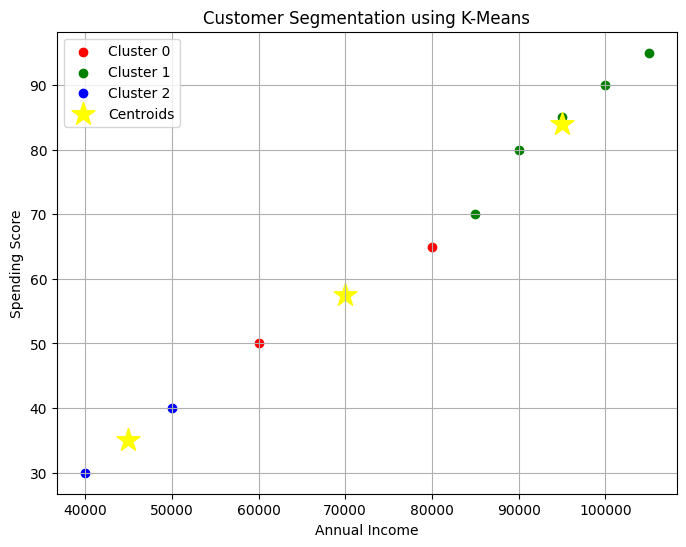

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample Customer Purchase History Dataset
data = {
    'Customer_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual_Income': [40000, 45000, 50000, 60000, 80000, 85000, 90000, 95000, 100000, 105000],
    'Spending_Score': [30, 35, 40, 50, 65, 70, 80, 85, 90, 95]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features for Clustering
X = df[['Annual_Income', 'Spending_Score']]

# Optional: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Output the Clusters
print(df)

# Visualize the Clusters
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for cluster in range(3):
    plt.scatter(df[df['Cluster'] == cluster]['Annual_Income'],
                df[df['Cluster'] == cluster]['Spending_Score'],
                label=f'Cluster {cluster}',
                color=colors[cluster])

# Plot Centroids (transform back from scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', marker='*', label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.grid()
plt.show()
